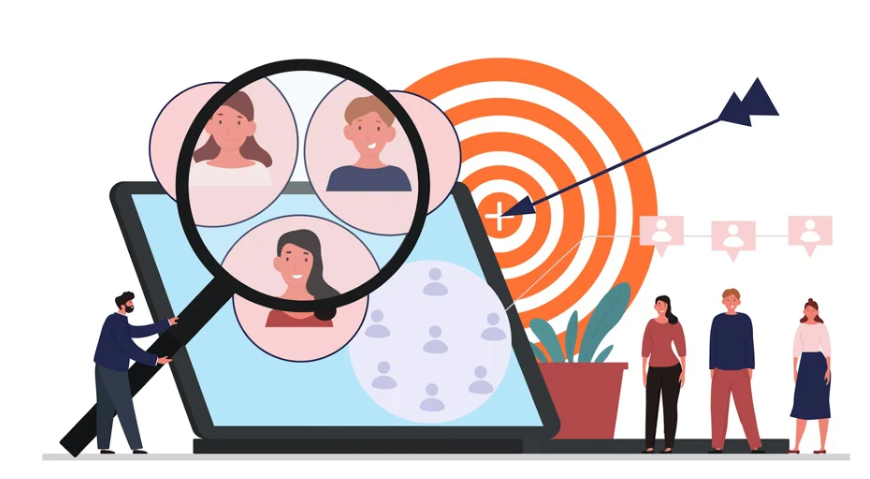

#Context

To conduct a thorough Exploratory Data Analysis to analyze user demography. Gain insights into factors influencing purchase decisions and identify areas for optimization.

#Know Your Data

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dfc=pd.read_csv("campaign - campaign.csv")

In [ ]:
dfc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,2,11,4,0,0,0,0,0,0,US
2235,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,0,3,8,0,0,0,0,0,0,SP
2236,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,1,5,8,0,0,0,0,0,0,SP
2237,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,4,10,3,0,0,0,0,0,0,IND


In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

Observations:

* There are 2239 rows and 27 columns
* No Null Values in the dataset

#Data Pre-processing

- Check Duplicates
- Check Outliers and Treatment
- Change Data Types of Column if needed
- Data Cleaning


**Check Unique Values and Datatype of each Feature and convert Datatype as required**

In [ ]:
for column in dfc.columns:
    print(f"Value counts for column '{column}':\n")
    print(dfc[column].value_counts())
    print("\n")

Value counts for column 'ID':

ID
1826    1
5680    1
4640    1
2525    1
9503    1
       ..
3262    1
5342    1
2379    1
2882    1
4070    1
Name: count, Length: 2239, dtype: int64


Value counts for column 'Year_Birth':

Year_Birth
1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1965    74
1973    74
1969    71
1974    69
1956    55
1979    53
1958    53
1952    52
1959    51
1977    51
1968    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     7
1993     5
1995     5
1994     3
1996     2
1893     1
1899     1
1941     1
1940     1
1900     1
Name: count, dtype: int64


Value counts for column 'Education':

Education
Graduation    1126
PhD            486
M

Post checking data, there are few features which need to change their Datatype

In [ ]:
df=dfc.copy()

In [ ]:
# Convert 'Year_Birth' to datetime format first
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

# Extract the year as an integer
df['Year_Birth'] = df['Year_Birth'].dt.year

Data Cleaning on Income Column and conversion to int data type:

* Removing "$" string

* Converting to int data type
* Replacing '$nan' with actual 'Nan' and then imputing it with Median value

In [ ]:
# Step 1: Explicitly replace '$NaN' with np.nan to ensure they are correctly identified
df['Income'] = df['Income'].replace('$nan', np.nan)

# Step 2: Remove the dollar sign and commas
df['Income'] = df['Income'].replace({'\$': '', ',': ''}, regex=True)

# Step 3: Convert the column to float, preserving NaN values
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# Step 4: Convert to integers where possible, preserving NaN
df['Income'] = df['Income'].apply(lambda x: int(x) if pd.notna(x) else np.nan)

In [ ]:
# Compute the mean of the column, excluding NaN
median_income = df['Income'].median()

# Impute NaN values with the median
df['Income'] = df['Income'].fillna(median_income)

In [ ]:
# Convert the 'Dt_Customer' column to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

In [ ]:
columns_to_convert=['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Country']

In [ ]:
# Convert columns to category data type
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   int64         
 1   Year_Birth           2239 non-null   int32         
 2   Education            2239 non-null   category      
 3   Marital_Status       2239 non-null   category      
 4   Income               2239 non-null   float64       
 5   Kidhome              2239 non-null   category      
 6   Teenhome             2239 non-null   category      
 7   Dt_Customer          2239 non-null   datetime64[ns]
 8   Recency              2239 non-null   int64         
 9   MntWines             2239 non-null   int64         
 10  MntFruits            2239 non-null   int64         
 11  MntMeatProducts      2239 non-null   int64         
 12  MntFishProducts      2239 non-null   int64         
 13  MntSweetProducts     2239 non-nul

**Check Duplicates**

In [ ]:
df.duplicated().any()

False

There are no Duplicate rows

**Check Outliers**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

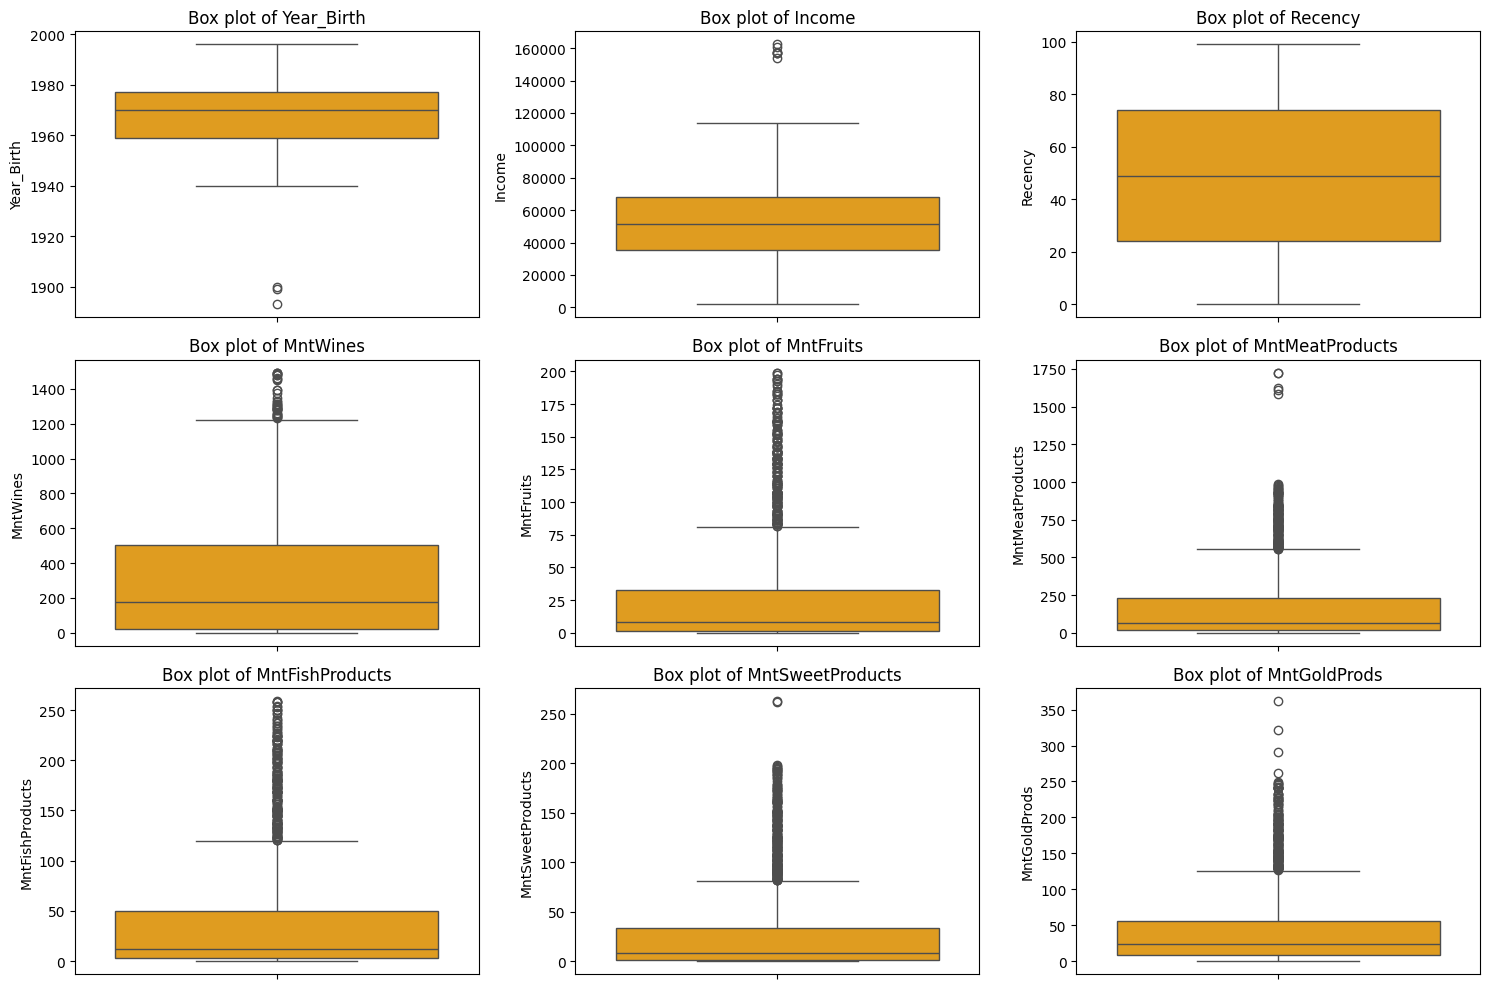

In [ ]:
# Select numerical columns and exclude the 'ID' column
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'int32']).drop(columns=['ID']).columns


# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through numerical columns and create a box plot for each
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid size based on the number of numerical columns
    sns.boxplot(y=df[column],color='orange')
    plt.title(f'Box plot of {column}')

# Adjust the layout
plt.tight_layout()
plt.show()

Outliers are present in all of the numerical columns except Recency

Outlier Treatment implemented in Capping method. This method effectively limits the influence of extreme values without completely removing them, which can be crucial when dealing with small datasets where every data point may carry significant information.

In [ ]:
# List of numerical columns excluding 'Recency'
columns_to_cap = [col for col in numerical_columns if col != 'Recency']

# Apply capping using the 99th percentile
for column in columns_to_cap:
    lower_limit = df[column].quantile(0.01)  # 1st percentile
    upper_limit = df[column].quantile(0.99)  # 99th percentile
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)

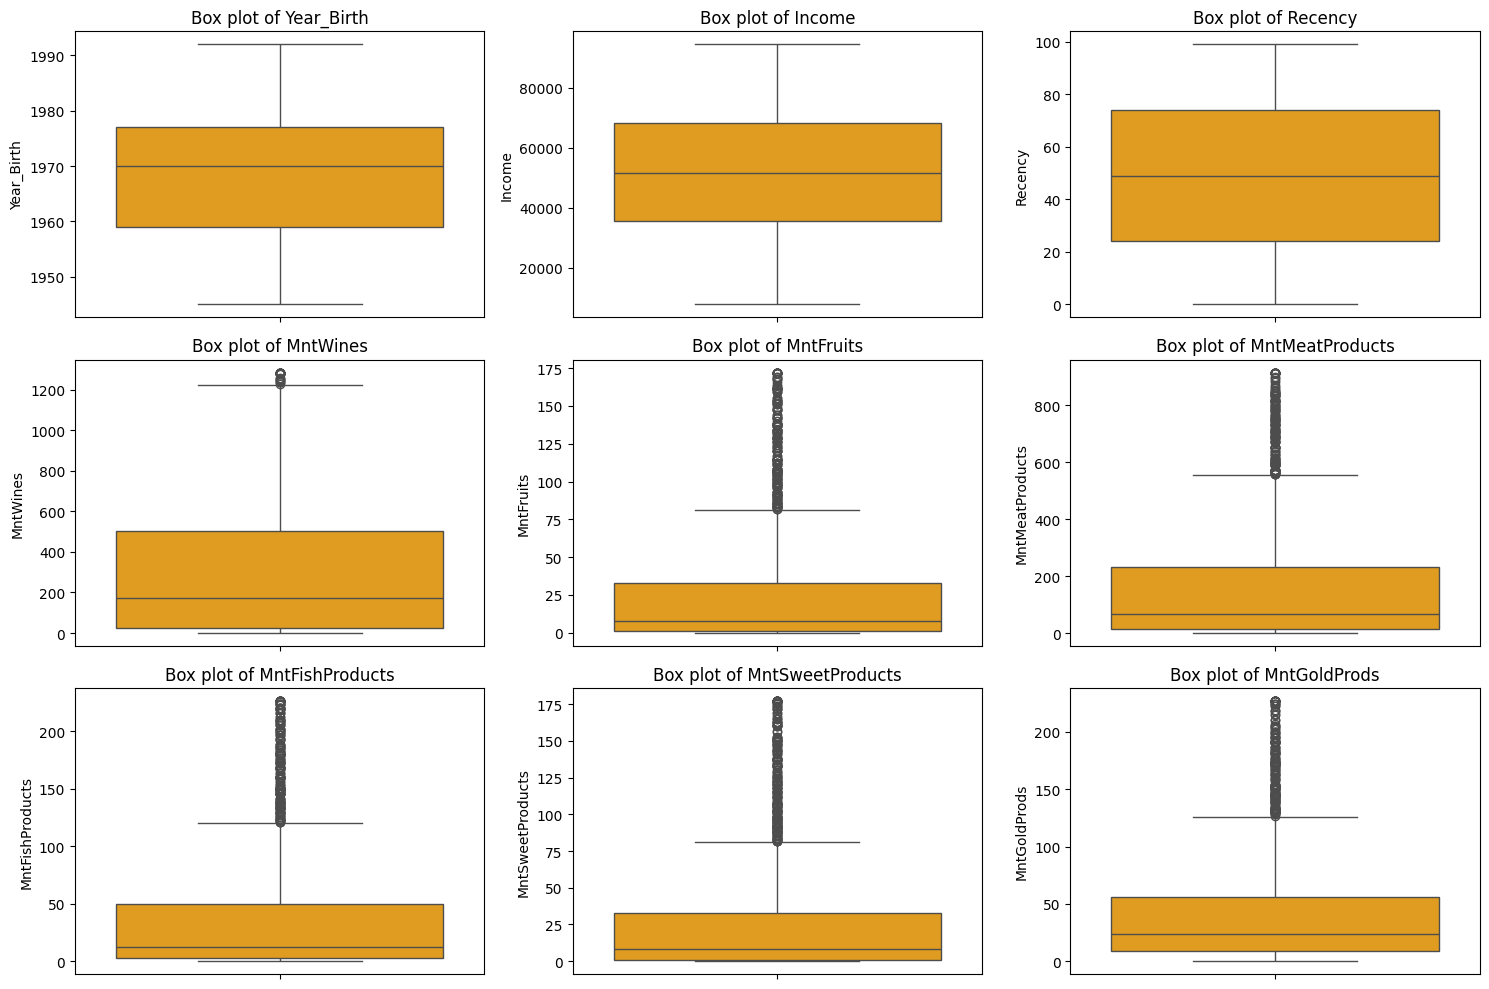

In [ ]:
# Filter numerical columns
#numerical_columns = df.select_dtypes(include=['number']).drop(columns=['ID'])

# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through numerical columns and create a box plot for each
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid size based on the number of numerical columns
    sns.boxplot(y=df[column],color='orange')
    plt.title(f'Box plot of {column}')

# Adjust the layout
plt.tight_layout()
plt.show()

The impact of outliers is reduced following capping method without losing on data

#Analysis and Distribution of Variables

- UniVariate / Multivariate Analysis
- Impact of each Feature on Revenue
- Statistical Summary

**Univariate Analysis**

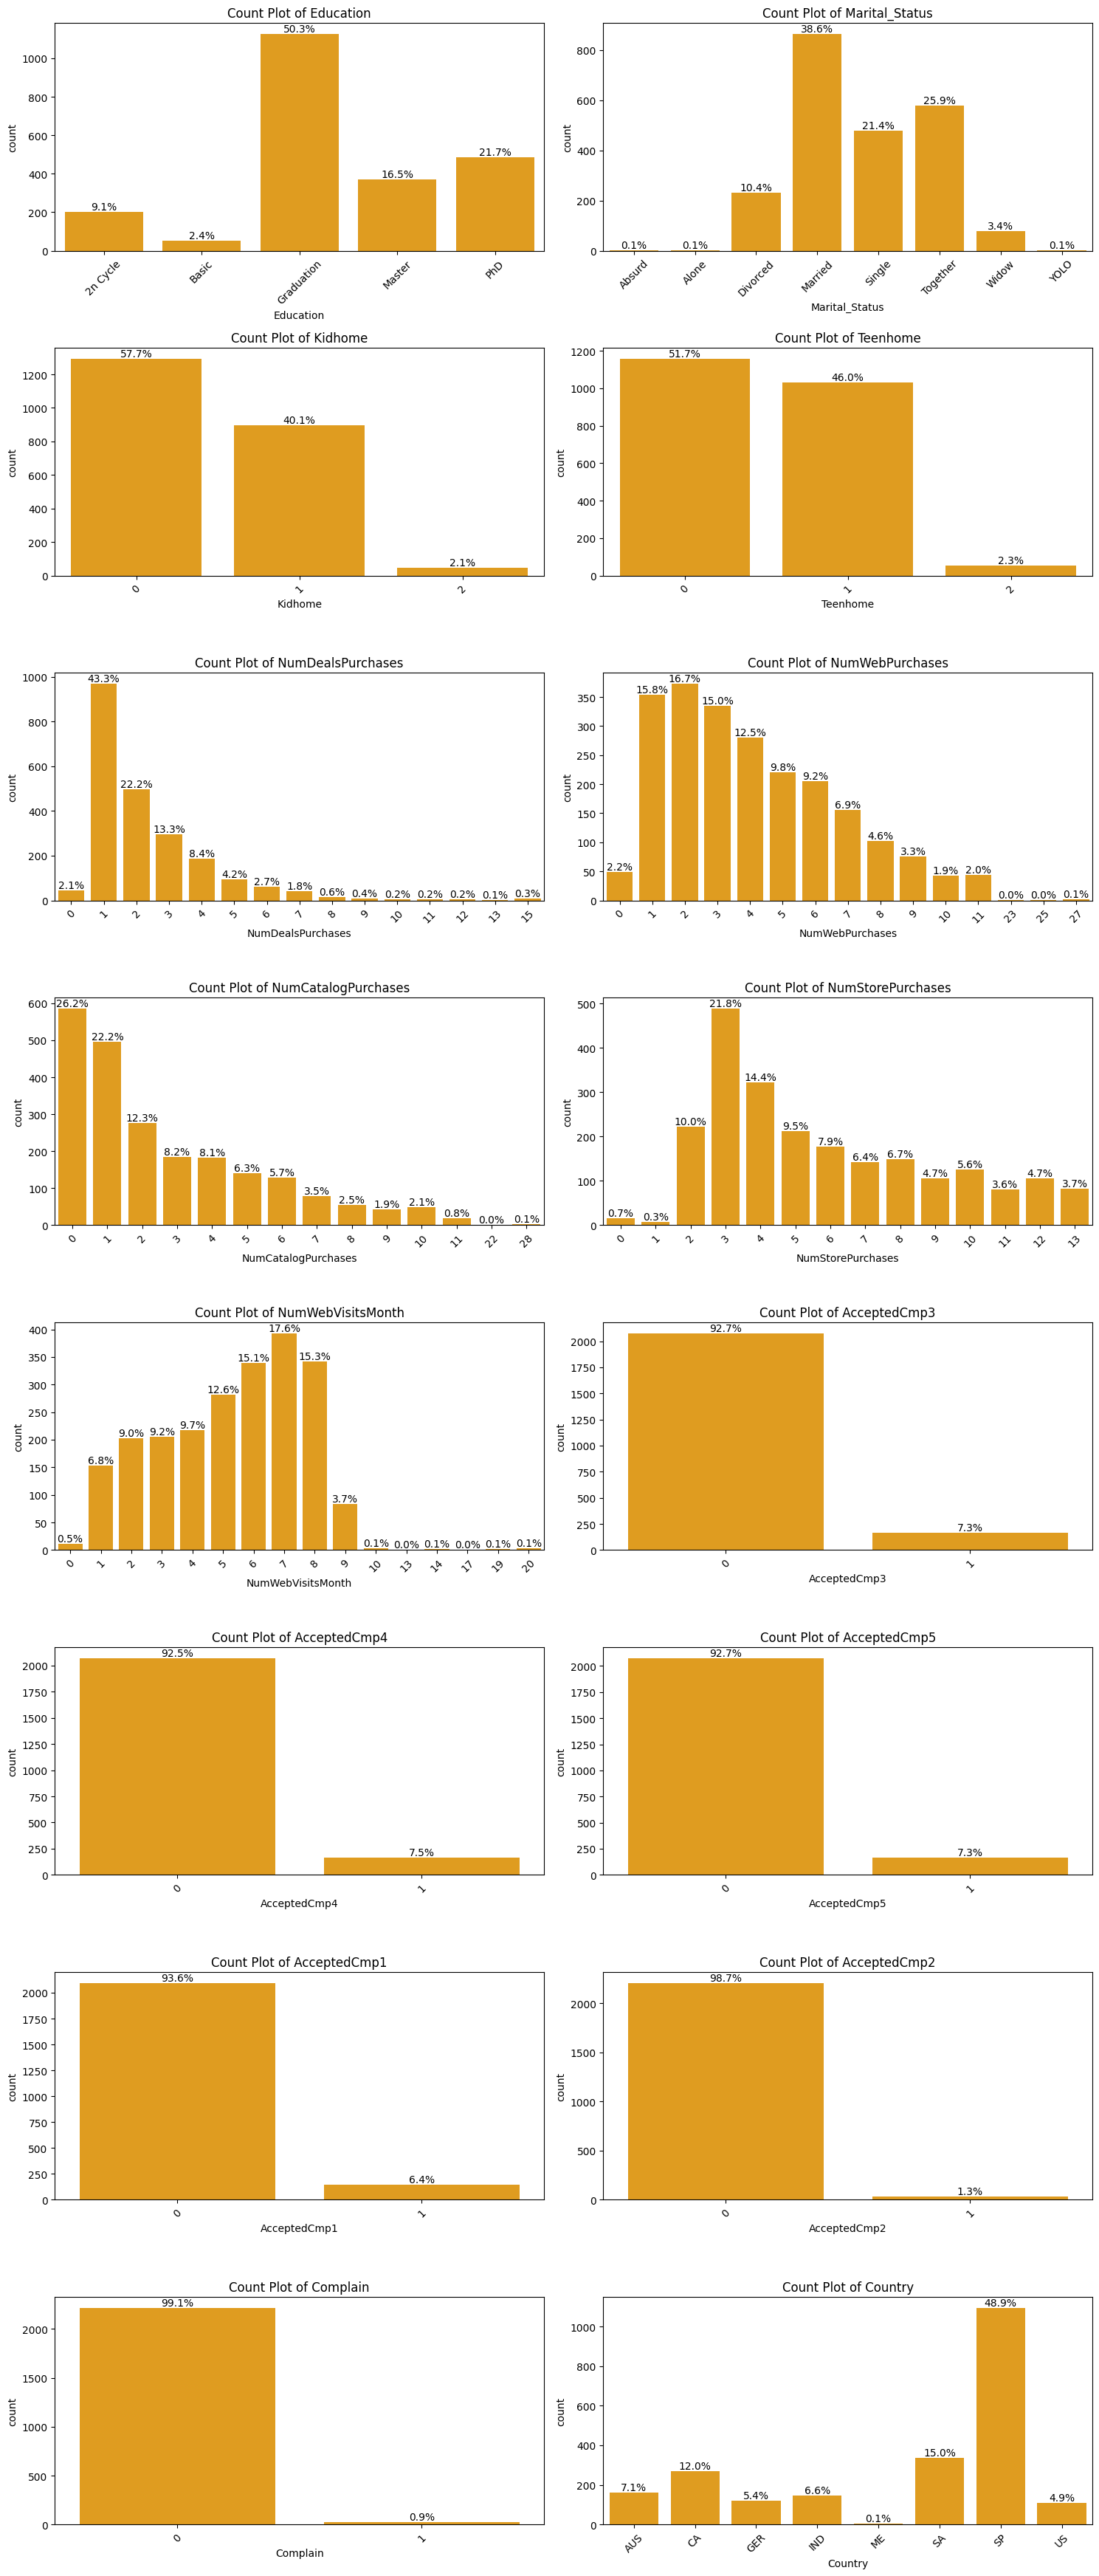

In [ ]:
# Select category columns
category_columns = df.select_dtypes(include=['category']).columns

# Determine the grid size for 8x2 layout
num_columns = 2
num_rows = math.ceil(len(category_columns) / num_columns)

# Set up the figure size and the 8x2 grid layout
plt.figure(figsize=(15, 35))

# Loop through each category column and create a subplot for each
for i, column in enumerate(category_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    ax = sns.countplot(data=df, x=column, color='orange')
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)

    # Annotate the percentage above each bar
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Adjust the layout
plt.tight_layout()
plt.show()


Observations:

* Education- 50% of the customers are Graduate followed by 22% Ph.D and 17% Masters
* Marital Status- Most of the customers are 'Married' with 39% followed by 26% 'Together' and 21% are 'Single'
* Kidhome- 58% of the houselholds have no children followed by 40% having one child and 2% have 2 children
* Teenhome- 52% have no teenagers in the household followed by 46% have 1 teenager at home and then 2% have 2 teens at home
* 43% of the customers made one purchase with a discount followed by 22% made 2 purchases and then 13% made three purchases with a discount
* About 17% of the customers made two purchases through company website followed by 16% who made one purchase and then 15% who made three purchases through company website
* 26% made no purchase using a catalogue followed by 22% who made one purchase and then 12% who made two purchases using catalogue
* 22% of the customers made three purchases directly in stores followed by 14% who made four purchase and 10% who made two purchases directly in stores
* 18% of the customers made seven visits to the company's website in the last month followed by 15.3% made eight visits and 15.1% made six visits to company website in the last month
* 7.3% of the customers accepted the offer in the third campaign
* 7.5% of the customers accepted the offer in the fourth campaign
* 7.3% of the customers accepted the offer in the fifth campaign
* 7.3% of the customers accepted the offer in the third campaign
* 6.4% of the customers accepted the offer in the first campaign
* 1.3% of the customers accepted the offer in the second campaign
* 0.9% of the customers complained in the last two years
* 49% of the customers belong to country 'SP' followed by 15% belonging to 'SA' and 12% belong to country 'CA'

**Month on Month enrollments**

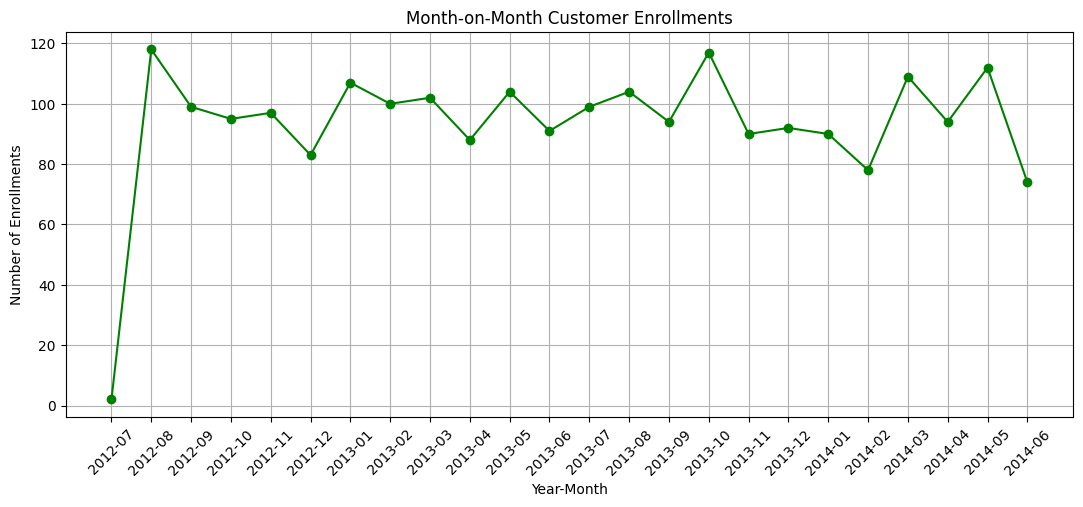

In [ ]:
# Extract month from 'Dt_Customer'
df['Month'] = df['Dt_Customer'].dt.month

# Month-on-Month Enrollments
# Creating a 'Year-Month' combination for grouping
df['Year-Month'] = df['Dt_Customer'].dt.to_period('M')
monthly_enrollments = df.groupby('Year-Month').size().reset_index(name='Enrollments')

# Plotting Month-on-Month Enrollments
plt.figure(figsize=(13, 5))
plt.plot(monthly_enrollments['Year-Month'].astype(str), monthly_enrollments['Enrollments'], marker='o', linestyle='-', color='g')
plt.xlabel('Year-Month')
plt.ylabel('Number of Enrollments')
plt.title('Month-on-Month Customer Enrollments')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Observations:
* The month '2012-08' got highest enrollments with nearly 120 customers followed by '2013-10' getting nearly 115 enrollments
* The plot starts from month '2012-07' to '2014-06' almost two years data.
* There is no significant jump or slide in the number of enrollments except two instances where in '2014-06' and '2014-02' it has gone below 80 enrollments  

**Numerical Features**

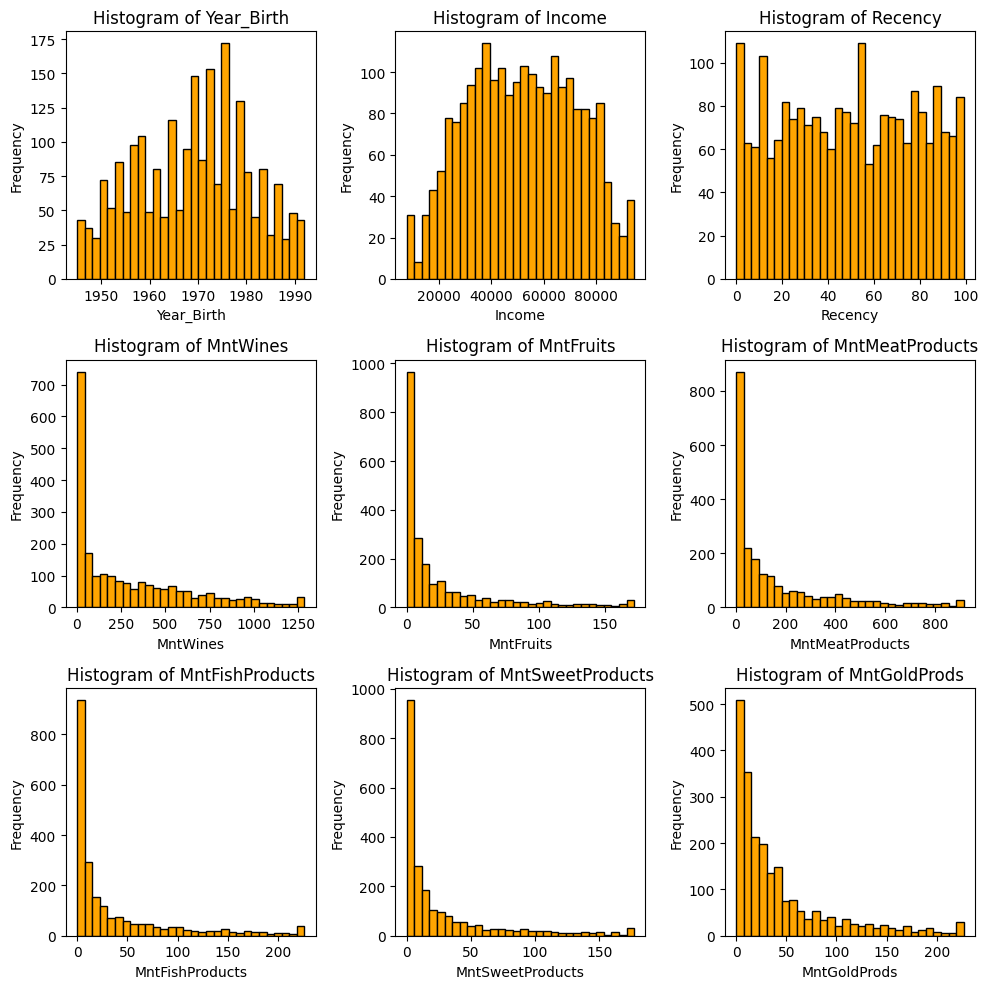

In [ ]:
# Setting up the figure and axes for a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Looping through each numerical column and corresponding axis to plot the histograms
for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=30, color='orange', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjusting layout for better visualization
plt.tight_layout()

# Displaying the plot
plt.show()

Observations:

* Most of the customers have got their year of birth between 1970 and 1980
* Most of the customers have the income group between 20000 and 80000
* There is no significant observation in Recency except a few spikes near 5,15 and 55 where more than 100 customers have got their last purchase in these days
* Most of the customers have spent on wines between 0 to 250 in last 2 years
* Most of the customers have spent on fruits between 0 to 50 in last 2 years
* Most of the customers have spent on Meat Products between 0 to 200 in last 2 years
* Most of the customers have spent on Fish Products between 0 to 50 in last 2 years
* Most of the customers have spent on Sweet Products between 0 to 50 in last 2 years
* Most of the customers have spent on Gold Products between 0 to 50 in last 2 years



**Statistical Summary**

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,2239.0,NaN,NaN,NaN,5590.444841,0.0,2827.5,5455.0,8423.5,11191.0,3246.372471
Year_Birth,2239.0,NaN,NaN,NaN,1968.864225,1945.0,1959.0,1970.0,1977.0,1992.0,11.667434
Education,2239,5,Graduation,1126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2239,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2239.0,NaN,NaN,NaN,51747.465261,7700.64,35533.5,51373.0,68277.5,94384.0,20597.995342
Kidhome,2239.0,3.0,0.0,1293.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teenhome,2239.0,3.0,0.0,1157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dt_Customer,2239,NaN,NaN,NaN,2013-07-10 10:26:25.350603008,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-09 00:00:00,2013-12-30 12:00:00,2014-06-29 00:00:00,NaN
Recency,2239.0,NaN,NaN,NaN,49.121036,0.0,24.0,49.0,74.0,99.0,28.963662
MntWines,2239.0,NaN,NaN,NaN,303.04109,1.0,24.0,174.0,504.5,1285.0,333.333368


Observations:

* Average Income of all customers in the dataset is found to be 51747 with maximum going upto 94384
* Average Recency is 49 days since customer last purchase
* Average amount spent on wines in last 2 years is 303 and maximum is 1285
* Average amount spent on Fruits in last 2 years is 26 and maximum is 172
* Average amount spent on Meat Products in last 2 years is 165 and maximum is 915
* Average amount spent on Fish Products in last 2 years is 37 and maximum is 226
* Average amount spent on Sweet Products in last 2 years is 27 and maximum is 177
* Average amount spent on Gold Products in last 2 years is 44 and maximum is 227


#Purchase Behaviour / Feature Engineering

1. **Total Spending:** Creating a new feature Total_Spending by summing up all the monetary columns (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds). This will give a holistic view of customer spending.
2. **Average Spending per Purchase:** Calculating the average spending per purchase by dividing Total_Spending by the total number of purchases (sum of NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases).
3. **Spending by Category Proportion:** Deriving the proportion of spending in each category (e.g., MntWines/Total_Spending) to understand customer preferences.
4. **Purchase Frequency:** Combining the purchase counts (NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases) to get an overall frequency of purchases.

In [ ]:
# 1. Total Spending
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                           'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# 2. Average Spending per Purchase
df['Total_Purchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                            'NumStorePurchases']].sum(axis=1)

df['Avg_Spending_per_Purchase'] = df['Total_Spending'] / df['Total_Purchases']

# Avoid division by zero in proportions by adding a small epsilon to the denominator
epsilon = 1e-10

df['Wines_Proportion'] = df['MntWines'] / (df['Total_Spending'] + epsilon)
df['Fruits_Proportion'] = df['MntFruits'] / (df['Total_Spending'] + epsilon)
df['Meat_Proportion'] = df['MntMeatProducts'] / (df['Total_Spending'] + epsilon)
df['Fish_Proportion'] = df['MntFishProducts'] / (df['Total_Spending'] + epsilon)
df['Sweet_Proportion'] = df['MntSweetProducts'] / (df['Total_Spending'] + epsilon)
df['Gold_Proportion'] = df['MntGoldProds'] / (df['Total_Spending'] + epsilon)

# 4. Purchase Frequency
df['Purchase_Frequency'] = df['Total_Purchases']

# Display the first few rows to verify the calculations, including the ID
df[['ID', 'Total_Spending', 'Avg_Spending_per_Purchase', 'Wines_Proportion',
    'Fruits_Proportion', 'Meat_Proportion', 'Fish_Proportion',
    'Sweet_Proportion', 'Gold_Proportion', 'Purchase_Frequency']]


,ID,Total_Spending,Avg_Spending_per_Purchase,Wines_Proportion,Fruits_Proportion,Meat_Proportion,Fish_Proportion,Sweet_Proportion,Gold_Proportion,Purchase_Frequency
0,1826,1178.24,78.549333,0.160409,0.088267,0.321666,0.094208,0.150428,0.185022,15
1,1,577.00,32.055556,0.804159,0.008666,0.110919,0.012132,0.000000,0.064125,18
2,10476,251.00,22.818182,0.533865,0.043825,0.235060,0.059761,0.007968,0.119522,11
3,1386,12.00,3.000000,0.833333,0.000000,0.166667,0.000000,0.000000,0.000000,4
4,5371,91.00,11.375000,0.065934,0.175824,0.263736,0.120879,0.000000,0.373626,8
...,...,...,...,...,...,...,...,...,...,...
2234,10142,689.00,34.450000,0.539913,0.026125,0.182874,0.068215,0.069666,0.113208,20
2235,5263,55.00,11.000000,0.090909,0.181818,0.236364,0.054545,0.145455,0.290909,5
2236,22,309.00,22.071429,0.598706,0.006472,0.284790,0.048544,0.016181,0.045307,14
2237,528,1383.00,69.150000,0.193059,0.027477,0.506869,0.107737,0.119306,0.045553,20


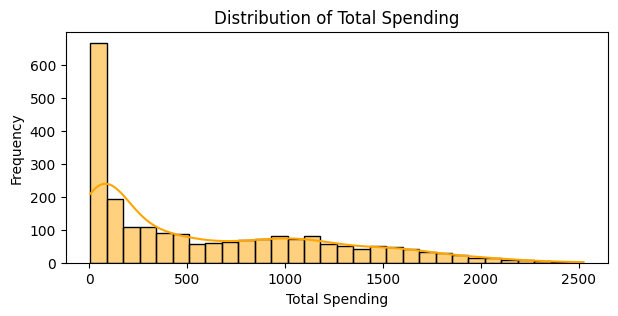

In [ ]:
# 1. Histogram of Total Spending
plt.figure(figsize=(7, 3))
sns.histplot(df['Total_Spending'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

* More than 600 customers have Total spendings of about 100

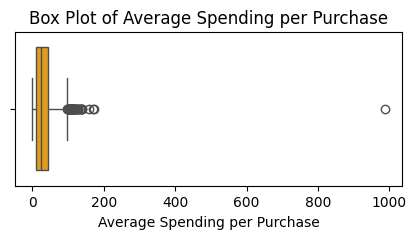

In [ ]:
# 2. Box Plot of Average Spending per Purchase
plt.figure(figsize=(5, 2))
sns.boxplot(x=df['Avg_Spending_per_Purchase'],color='orange')
plt.title('Box Plot of Average Spending per Purchase')
plt.xlabel('Average Spending per Purchase')
plt.show()

* Average Spending per purchase is around 50 for most of the customers

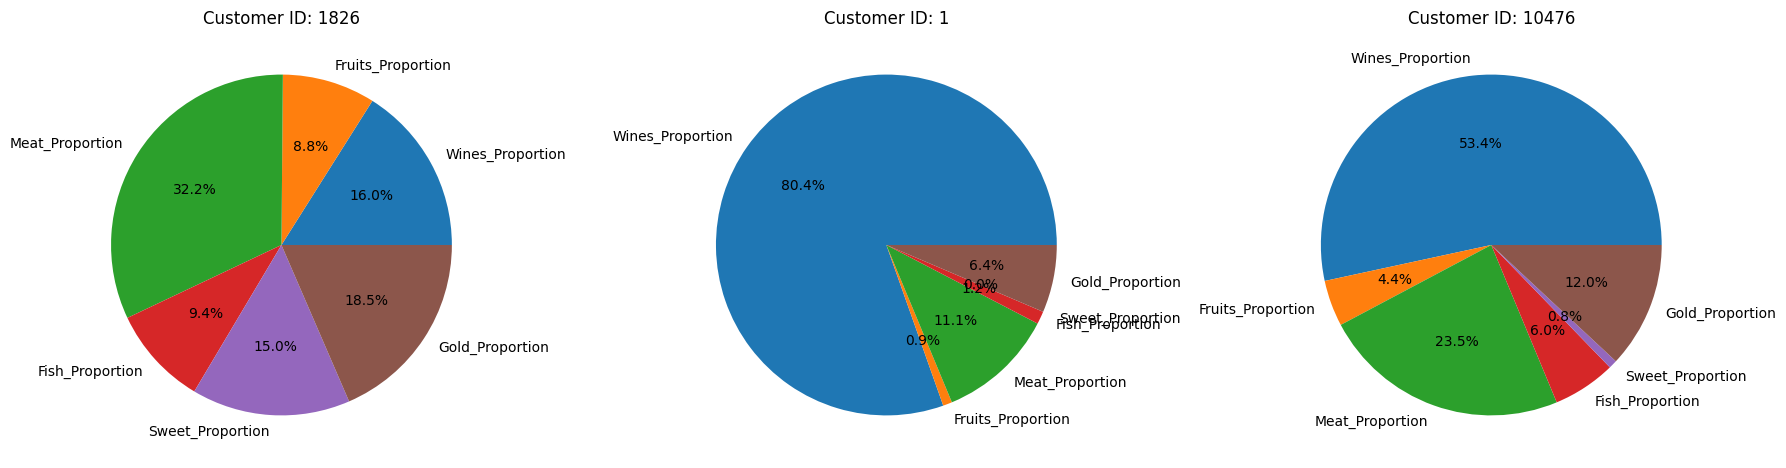

In [ ]:
# 3. Pie Chart of Spending Proportions
# Define the spending proportions
spending_proportions = ['Wines_Proportion', 'Fruits_Proportion', 'Meat_Proportion',
                        'Fish_Proportion', 'Sweet_Proportion', 'Gold_Proportion']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 14))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot pie charts for the first 5 customers
for i in range(3):
    axes[i].pie(df.loc[i, spending_proportions], labels=spending_proportions, autopct='%1.1f%%')
    axes[i].set_title(f'Customer ID: {df.loc[i, "ID"]}')

plt.tight_layout()
plt.show()

* Above Pie charts are shown as an example of how different customers buy products in what proportions

#Hypothesis Testing

Summary:

1. ANOVA/Kruskal-Wallis: To test if income depends on education level.
2. Pearson/Spearman Correlation: To assess the relationship between income and total spending.
3. t-test/Mann-Whitney U test: To compare wine spending between couples and singles.
4. Chi-square test: To determine if lower-income individuals are more likely to accept campaigns.

#### Is income of customers dependent on their education

**Test:** ANOVA (Analysis of Variance) or Kruskal-Wallis test (if income distribution is not normal)

**Reason:** ANOVA is suitable for comparing means across multiple groups (education levels) to see if there is a statistically significant difference in income.

**Null Hypothesis:** There is no significant difference in income across different education levels.



In [ ]:
from scipy.stats import f_oneway,kruskal
from scipy.stats import shapiro
from scipy.stats import levene

In [ ]:
education_income_groups = [group["Income"].values for name, group in df.groupby("Education")]

Normality and Homogeneity Tests:
- Check normality for each education group.
- Check homogeneity using Levene's test.

Decision:
- If normality and homogeneity assumptions hold: Use ANOVA.
- If assumptions do not hold: Use Kruskal-Wallis test.

In [ ]:
if shapiro(df['Income']).pvalue >= 0.05 and levene(*education_income_groups).pvalue >= 0.05:
    anova_result = f_oneway(*education_income_groups)
    print(f"ANOVA p-value: {anova_result.pvalue}")
else:
    kruskal_result = kruskal(*education_income_groups)
    print(f"Kruskal-Wallis p-value: {kruskal_result.pvalue}")

Kruskal-Wallis p-value: 7.64432736499016e-30


kruskal_result.pvalue < 0.05, we reject the null hypothesis.

**This indicates that income is significantly different across at least some education levels.**

#### Do higher income people spend more (take in account spending in all categories together)

**Test:** Pearson correlation or Spearman rank correlation (if data is not normally distributed).

**Reason:** Correlation analysis helps determine the relationship between income and total spending.

**Null Hypothesis:** There is no correlation between income and total spending.


In [ ]:
from scipy.stats import pearsonr, spearmanr

In [ ]:
if shapiro(df['Income']).pvalue >= 0.05 and shapiro(df['Total_Spending']).pvalue >= 0.05:
    pearson_corr, p_value = pearsonr(df['Income'], df['Total_Spending'])
    print(f"Pearson correlation p-value: {p_value}")
else:
    spearman_corr, p_value = spearmanr(df['Income'], df['Total_Spending'])
    print(f"Spearman correlation p-value: {p_value}")

Spearman correlation p-value: 0.0


p_value < 0.05, we reject the null hypothesis.

**This suggests a significant correlation between income and total spending.**

#### Do couples spend more or less money on wine than people living alone (set 'Married','Together':'In couple' and 'Divorced','Single','Absurd','Widow','YOLO':'Alone')

**Test:** Independent t-test or Mann-Whitney U test (if data is not normally distributed).

**Reason:** An independent t-test can compare the means of two independent groups (couples vs. singles).

**Null Hypothesis:** There is no difference in wine spending between couples and people living alone.

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

Normality Check:
* Check normality for MntWines for both groups (In Couple and Alone).
* Check homogeneity using Levene's test.

Decision:
* If normality and homogeneity hold: Use independent t-test.
* If not: Use Mann-Whitney U test

In [ ]:
df['LivingStatus'] = df['Marital_Status'].replace({'Married': 'In Couple', 'Together': 'In Couple',
                                                   'Divorced': 'Alone', 'Single': 'Alone',
                                                   'Absurd': 'Alone', 'Widow': 'Alone', 'YOLO': 'Alone'})
couples_wine = df[df['LivingStatus'] == 'In Couple']['MntWines']
singles_wine = df[df['LivingStatus'] == 'Alone']['MntWines']

In [ ]:
if (shapiro(couples_wine).pvalue >= 0.05 and shapiro(singles_wine).pvalue >= 0.05 and
    levene(couples_wine, singles_wine).pvalue >= 0.05):
    t_stat, p_val = ttest_ind(couples_wine, singles_wine)
    print(f"t-test p-value: {p_val}")
else:
    mannwhitney_result = mannwhitneyu(couples_wine, singles_wine)
    print(f"Mann-Whitney U test p-value: {mannwhitney_result.pvalue}")

Mann-Whitney U test p-value: 0.8647257436814264


the p-value is greater than 0.05, we fail to reject the null hypothesis.

**There is no difference in wine spending between couples and people living alone.**

#### Are People with Lower Income More Attracted to Campaigns?


**Test:** Chi-square test for independence.

**Reason:** Chi-square tests are used to examine the relationship between categorical variables.

**Null Hypothesis:** Income bracket (below or above median) is independent of campaign acceptance.


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
median_income = df['Income'].median()
df['IncomeBracket'] = df['Income'].apply(lambda x: 'Below Median' if x < median_income else 'Above Median')
df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].apply(pd.to_numeric)
df['AcceptedAnyCampaign'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)


In [ ]:
contingency_table = pd.crosstab(df['IncomeBracket'], df['AcceptedAnyCampaign'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-square test p-value: {p}")

Chi-square test p-value: 2.5115657237830455e-32


In [ ]:
print(contingency_table)

AcceptedAnyCampaign    0    1
IncomeBracket                
Above Median         784  348
Below Median         992  115


p < 0.05, we reject the null hypothesis.

* **Result suggest that there is a significant association between income bracket and campaign acceptance.**
* **From the Contingecy Table we can clearly see that customers with Income above median are more attracted to campaigns.**

#Insights

* Education- 50% of the customers are Graduate followed by 22% Ph.D and 17% Masters
* Marital Status- Most of the customers are 'Married' with 39% followed by 26% 'Together' and 21% are 'Single'
* Kidhome- 58% of the houselholds have no children followed by 40% having one child and 2% have 2 children
* Teenhome- 52% have no teenagers in the household followed by 46% have 1 teenager at home and then 2% have 2 teens at home
* 43% of the customers made one purchase with a discount followed by 22% made 2 purchases and then 13% made three purchases with a discount
* About 17% of the customers made two purchases through company website followed by 16% who made one purchase and then 15% who made three purchases through company website
* 26% made no purchase using a catalogue followed by 22% who made one purchase and then 12% who made two purchases using catalogue
* 22% of the customers made three purchases directly in stores followed by 14% who made four purchase and 10% who made two purchases directly in stores
* 18% of the customers made seven visits to the company's website in the last month followed by 15.3% made eight visits and 15.1% made six visits to company website in the last month
* 7.3% of the customers accepted the offer in the third campaign
* 7.5% of the customers accepted the offer in the fourth campaign
* 7.3% of the customers accepted the offer in the fifth campaign
* 7.3% of the customers accepted the offer in the third campaign
* 6.4% of the customers accepted the offer in the first campaign
* 1.3% of the customers accepted the offer in the second campaign
* 0.9% of the customers complained in the last two years
* 49% of the customers belong to country 'SP' followed by 15% belonging to 'SA' and 12% belong to country 'CA'
* The month '2012-08' got highest enrollments with nearly 120 customers followed by '2013-10' getting nearly 115 enrollments
* The plot starts from month '2012-07' to '2014-06' almost two years data.
* There is no significant jump or slide in the number of enrollments except two instances where in '2014-06' and '2014-02' it has gone below 80 enrollments  
* Most of the customers have got their year of birth between 1970 and 1980
* Most of the customers have the income group between 20000 and 80000
* There is no significant observation in Recency except a few spikes near 5,15 and 55 where more than 100 customers have got their last purchase in these days
* Most of the customers have spent on wines between 0 to 250 in last 2 years
* Most of the customers have spent on fruits between 0 to 50 in last 2 years
* Most of the customers have spent on Meat Products between 0 to 200 in last 2 years
* Most of the customers have spent on Fish Products between 0 to 50 in last 2 years
* Most of the customers have spent on Sweet Products between 0 to 50 in last 2 years
* Most of the customers have spent on Gold Products between 0 to 50 in last 2 years
* Average Income of all customers in the dataset is found to be 51747 with maximum going upto 94384
* Average Recency is 49 days since customer last purchase
* Average amount spent on wines in last 2 years is 303 and maximum is 1285
* Average amount spent on Fruits in last 2 years is 26 and maximum is 172
* Average amount spent on Meat Products in last 2 years is 165 and maximum is 915
* Average amount spent on Fish Products in last 2 years is 37 and maximum is 226
* Average amount spent on Sweet Products in last 2 years is 27 and maximum is 177
* Average amount spent on Gold Products in last 2 years is 44 and maximum is 227
* More than 600 customers have Total spendings of about 100
* Average Spending per purchase is around 50 for most of the customers
* Income is significantly different across at least some education levels.
* There is a significant correlation between income and total spending.
* There is no difference in wine spending between couples and people living alone.
* Result suggest that there is a significant association between income bracket and campaign acceptance.
* From the Contingecy Table we can clearly see that customers with Income above median are more attracted to campaigns.

#Recommendations

1. **Targeted Marketing Based on Income Levels**

  Observation: Customers with incomes above the median are more likely to accept campaigns.

  Recommendation: Develop and implement targeted marketing campaigns specifically tailored to higher-income customers. This could involve promoting premium products, offering exclusive deals, or using personalized marketing messages that align with the interests and purchasing behaviors of this demographic.
2. **Personalized Campaigns for Different Education Levels**
  
  Observation: Income varies significantly across education levels.

  Recommendation: Use education as a segmentation criterion for personalized marketing efforts. For instance, Ph.D. and Master's degree holders might be more interested in high-quality and high-value products, whereas customers with basic education might respond better to discounts and promotional offers. Crafting campaigns based on educational backgrounds could enhance engagement and conversion rates.
3. **Increase Promotion of Wine Products**

  Observation: A large number of customers have spent on wines, indicating a potential interest in this product category.

  Recommendation: Run targeted promotions for wine products, perhaps using subscription models or special seasonal offers. Wine tasting events, loyalty rewards for frequent wine buyers, or creating wine bundles could also help increase sales.
4. **Enhance Online Shopping Experience**

  Observation: A significant portion of customers make multiple purchases through the company's website.

  Recommendation: Invest in enhancing the online shopping experience. This could include improving website navigation, providing personalized product recommendations, offering online-exclusive deals, and ensuring a seamless checkout process. These improvements could boost online sales and customer satisfaction.

5. **Focus on Reducing Customer Recency**

  Observation: The average recency is 49 days, which indicates that customers do not purchase frequently.

  Recommendation: Implement strategies to reduce recency, such as loyalty programs that offer discounts or rewards for regular purchases, personalized follow-up emails with product recommendations, and time-limited offers to encourage repeat purchases. Additionally, identifying and targeting customers who have not made a purchase recently with reactivation campaigns could help re-engage them.
6. **Develop Targeted Campaigns for Families with Children and Teenagers**

  Observation: A significant number of households have children or teenagers.

  Recommendation: Develop campaigns that focus on family-friendly products or create bundles that cater to households with children and teenagers. For instance, promoting family packs or offering discounts on products like sweets, snacks, or educational materials could resonate well with these customers.
7. **Utilize Catalogs for Product Promotion**
  
  Observation: A considerable number of customers make purchases using catalogs.

  Recommendation: Continue to invest in high-quality, visually appealing catalogs that highlight best-selling and new products. Offering limited-time catalog-exclusive deals can also encourage customers to make purchases through this channel. Additionally, digital versions of the catalogs can be made available for customers who prefer browsing online.
8. **Optimize Store-Based Campaigns**

  Observation: A notable percentage of customers make purchases directly in stores.

  Recommendation: Enhance in-store promotions and customer experiences. Consider offering in-store pickup options for online purchases, loyalty discounts for frequent store visitors, and hosting in-store events that can attract more foot traffic and drive sales.
9. **Improve Campaign Acceptance Among Lower-Income Customers**

  Observation: Lower-income customers are less likely to accept campaigns.

  Recommendation: Design campaigns that are more appealing to lower-income customers, such as offering significant discounts, value-for-money bundles, or loyalty rewards. Communicating the value and affordability of products in campaigns could increase acceptance rates among this group.
10. **Monitor Customer Complaints and Improve Customer Service**

  Observation: Although only a small percentage of customers have complained, addressing complaints effectively is crucial.

  Recommendation: Implement a robust feedback system to address customer complaints promptly and effectively. Regularly analyze the nature of complaints to identify and rectify common issues. Providing excellent customer service will help build trust and loyalty, ultimately reducing customer churn.
11. **Focus on High-Performing Countries for Growth Opportunities**

  Observation: A significant proportion of customers are from specific countries (e.g., SP).

  Recommendation: Identify and understand the characteristics and preferences of customers from high-performing countries. Tailor marketing strategies, product offerings, and campaigns to these regions to maximize engagement and sales.
12. **Leverage Seasonal Trends and Enrollment Data**

  Observation: There are peak enrollment months.

  Recommendation: Align marketing and campaign strategies with these seasonal trends to capture the maximum customer interest. Plan product launches, promotions, and campaigns around these peak times to take advantage of increased customer engagement.

**Conclusion:**

These recommendations are based on the insights derived from the data analysis and aim to optimize marketing strategies, increase customer engagement, and enhance overall business performance. By leveraging the observed customer behaviors and preferences, the e-commerce business can create more effective campaigns, improve customer loyalty, and drive sales growth.






